In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem.lancaster import LancasterStemmer
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## DataFrame Import and Text Preprocessing

In [2]:
df = pd.read_pickle("text_df_v4.pkl")
df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
...,...,...,...,...,...,...,...,...,...,...
81756,The novel coronavirus (COVID-19) was identifie...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81757,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81758,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81759,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care


In [3]:
df.drop_duplicates(inplace=True)
df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
...,...,...,...,...,...,...,...,...,...,...
81756,The novel coronavirus (COVID-19) was identifie...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81757,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81758,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81759,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care


In [4]:
english_stop_words = stopwords.words('english')

In [5]:
#including additional stopwords that will not provide additional insight into topics
additional_stop_words = ["covid", "pandemic", "novel", "coronavirus", "global", 
                        "million", "thousand", "hundred", "billion", "quarter", "year", 
                        "january", "february", "march", "april", "may", "june", 
                        "july", "august", "september", "october", "november", "december",
                        "jan", "feb", "mar", "apr", "jun", "jul", "aug", "sep", "oct", "nov", 
                         "dec", "company", "business", "us", "also", "could"]

In [6]:
all_stop_words = english_stop_words + additional_stop_words

In [7]:
#removing numbers from text
def remove_numbers(text):
    return re.sub(r'\d+','', text)

In [8]:
df_clean = df.copy()
df_clean = df_clean[df_clean.disclosure_bool == 1] #removing rows with no disclosure
df_clean["text"] = df_clean.text.apply(remove_numbers)
df_clean

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
1,"he COVID- pandemic has adversely impacted, and...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
4,"Accordingly, COVID- has negatively affected ou...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
...,...,...,...,...,...,...,...,...,...,...
81756,The novel coronavirus (COVID-) was identified ...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81757,The COVID- pandemic also may reduce demand for...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81758,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
81759,The COVID- pandemic has also significantly inc...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care


## LDA Model
A LDA model was ran for exploratory purposes. The NMF model following this section was ultimately used as it produced more intuitive topics.

In [9]:
vectorizer = CountVectorizer(stop_words=all_stop_words, min_df=10, ngram_range=(1,1))
doc_word = vectorizer.fit_transform(df_clean.text)
doc_word.shape

(50793, 7488)

In [10]:
lda_model = LatentDirichletAllocation(7)
doc_topic = lda_model.fit_transform(doc_word)
doc_topic.shape

(50793, 7)

In [11]:
topic_word = lda_model.components_
topic_word.shape

(7, 7488)

In [12]:
words = vectorizer.get_feature_names()
t = lda_model.components_.argsort(axis=1)[:,-1:-20:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['employees',
  'health',
  'including',
  'restrictions',
  'work',
  'measures',
  'customers',
  'operations',
  'continue',
  'safety',
  'travel',
  'orders',
  'certain',
  'home',
  'response',
  'world',
  'government',
  'costs',
  'facilities'],
 ['impact',
  'operations',
  'financial',
  'results',
  'economic',
  'including',
  'continue',
  'demand',
  'adversely',
  'future',
  'customers',
  'products',
  'condition',
  'significant',
  'adverse',
  'impacts',
  'markets',
  'supply',
  'result'],
 ['tax',
  'act',
  'related',
  'income',
  'relief',
  'interest',
  'loan',
  'loans',
  'cares',
  'certain',
  'economic',
  'payment',
  'due',
  'rate',
  'losses',
  'response',
  'impact',
  'programs',
  'federal'],
 ['impairment',
  'value',
  'assets',
  'reporting',
  'credit',
  'result',
  'cash',
  'market',
  'fair',
  'goodwill',
  'impact',
  'future',
  'losses',
  'economic',
  'based',
  'lease',
  'related',
  'expected',
  'carrying'],
 ['capital',
  '

## NMF Model

In [13]:
vectorizer = TfidfVectorizer(stop_words=all_stop_words, min_df=10, ngram_range=(1,3))
doc_word = vectorizer.fit_transform(df_clean.text)
doc_word.shape

(50793, 77968)

In [14]:
nmf_model = NMF(7)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

(50793, 7)

In [15]:
topic_word = nmf_model.components_
topic_word.shape

(7, 77968)

In [16]:
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-30:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['employees',
  'customers',
  'including',
  'health',
  'products',
  'demand',
  'continue',
  'restrictions',
  'measures',
  'impact',
  'travel',
  'supply',
  'spread',
  'work',
  'world',
  'operations',
  'services',
  'economic',
  'significant',
  'result',
  'ability',
  'safety',
  'orders',
  'government',
  'actions',
  'certain',
  'impacted',
  'suppliers',
  'businesses'],
 ['months',
  'primarily',
  'sales',
  'ended',
  'due',
  'months ended',
  'lower',
  'compared',
  'net',
  'offset',
  'decreased',
  'decrease',
  'partially',
  'three',
  'partially offset',
  'primarily due',
  'costs',
  'revenue',
  'nine',
  'driven',
  'expenses',
  'increased',
  'nine months',
  'higher',
  'increase',
  'related',
  'three months',
  'three months ended',
  'period'],
 ['statements',
  'forward looking',
  'looking',
  'forward',
  'looking statements',
  'forward looking statements',
  'risks',
  'factors',
  'report',
  'form',
  'uncertainties',
  'risk',
  'ris

In [17]:
#name topics
topic_names = {0:"Health/Safety/Other", 1:"Revenue Impacts", 2:"Risk Factors", 3:"Results of Operations", 
               4:"Impairment", 5:"Capital and Liquidity", 6:"Tax"}

In [18]:
components_df = pd.DataFrame(nmf_model.components_, columns=vectorizer.get_feature_names()).T.rename(columns=topic_names).reset_index()

In [19]:
components_df

,index,Health/Safety/Other,Revenue Impacts,Risk Factors,Results of Operations,Impairment,Capital and Liquidity,Tax
0,aa,0.000000,0.000025,0.000214,0.000000,0.000710,0.002056,0.000000
1,aag,0.000000,0.001050,0.000902,0.000000,0.001438,0.000824,0.001728
2,aao,0.000733,0.000239,0.000118,0.000000,0.000288,0.000237,0.000269
3,abandon,0.005509,0.000000,0.000893,0.000000,0.001559,0.000000,0.000000
4,abandonment,0.002318,0.001049,0.004016,0.000000,0.000626,0.000000,0.000123
...,...,...,...,...,...,...,...,...
77963,zero interest,0.000277,0.000122,0.000000,0.000000,0.000000,0.001257,0.001281
77964,zero percent,0.000040,0.000683,0.000000,0.000000,0.000000,0.002282,0.002480
77965,zika,0.003824,0.000000,0.000000,0.000538,0.000000,0.000000,0.000000
77966,zone,0.000763,0.002257,0.000000,0.001009,0.000113,0.000419,0.000233


In [20]:
components_melt = components_df.melt(id_vars = "index").rename(columns={"index":"word(s)", "variable":"topic"})
components_melt

,word(s),topic,value
0,aa,Health/Safety/Other,0.000000
1,aag,Health/Safety/Other,0.000000
2,aao,Health/Safety/Other,0.000733
3,abandon,Health/Safety/Other,0.005509
4,abandonment,Health/Safety/Other,0.002318
...,...,...,...
545771,zero interest,Tax,0.001281
545772,zero percent,Tax,0.002480
545773,zika,Tax,0.000000
545774,zone,Tax,0.000233


In [21]:
#export csv for Tableau
components_melt.to_csv("components_melt.csv")

In [22]:
components_melt_top = components_melt.sort_values(['topic', 'value'], ascending=False).groupby('topic').head(15).reset_index()
del components_melt_top["index"]
components_melt_top

,word(s),topic,value
0,act,Tax,1.415847
1,tax,Tax,1.172490
2,cares,Tax,1.103551
3,cares act,Tax,1.099108
4,relief,Tax,0.739807
...,...,...,...
100,markets,Capital and Liquidity,0.353067
101,program,Capital and Liquidity,0.322305
102,share,Capital and Liquidity,0.319090
103,repurchase,Capital and Liquidity,0.318725


In [23]:
#export csv for Tableau
components_melt_top.to_csv("components_melt_top.csv")

## t-SNE - 2D Model Visualization

In [24]:
nmf_embedding = nmf_model.transform(doc_word)

In [25]:
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0))/nmf_embedding.std(axis=0)

In [40]:
from sklearn.manifold import TSNE
TSNE = TSNE(perplexity=75, learning_rate = 20000, metric="cosine")

In [41]:
tsne_embedding = TSNE.fit_transform(nmf_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])

In [42]:
tsne_embedding

,x,y
0,-104.042320,-24.769369
1,78.535721,64.490433
2,-11.016402,80.088112
3,-69.803528,94.777161
4,-17.465685,81.589195
...,...,...
50788,-60.819141,102.395523
50789,6.442482,109.455681
50790,26.607616,100.902351
50791,-25.764204,-99.245796


In [43]:
tsne_embedding['topic'] = nmf_embedding.argmax(axis=1)

In [44]:
tsne_embedding["topic_name"] = tsne_embedding.topic.map(topic_names)

In [45]:
tsne_embedding

,x,y,topic,topic_name
0,-104.042320,-24.769369,2,Risk Factors
1,78.535721,64.490433,3,Results of Operations
2,-11.016402,80.088112,0,Health/Safety/Other
3,-69.803528,94.777161,0,Health/Safety/Other
4,-17.465685,81.589195,0,Health/Safety/Other
...,...,...,...,...
50788,-60.819141,102.395523,0,Health/Safety/Other
50789,6.442482,109.455681,0,Health/Safety/Other
50790,26.607616,100.902351,3,Results of Operations
50791,-25.764204,-99.245796,5,Capital and Liquidity


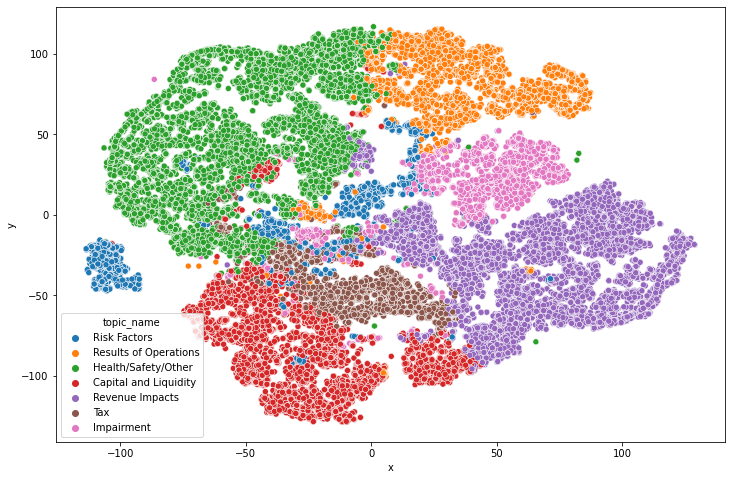

In [46]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x=tsne_embedding.x, y=tsne_embedding.y, hue=tsne_embedding.topic_name);

In [47]:
#export for Tableau
tsne_embedding.to_csv("tsne.csv")

## Perform Sentiment Analysis

In [34]:
sid_obj = SentimentIntensityAnalyzer()
sentiment = []
for text in df_clean.text:
    sentiment.append(sid_obj.polarity_scores(text))

In [35]:
len(sentiment)

50793

In [36]:
sentiment[0]

{'neg': 0.023, 'neu': 0.837, 'pos': 0.141, 'compound': 0.9855}

## Create Final DataFrame

In [37]:
final_df = df[df.disclosure_bool == 1].reset_index()
final_df['topic'] = doc_topic.argmax(axis=1)
final_df["topic_name"] = final_df.topic.map(topic_names)
final_df = final_df.join(pd.DataFrame(sentiment))
del final_df["index"]
final_df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector,topic,topic_name,neg,neu,pos,compound
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,2,Risk Factors,0.023,0.837,0.141,0.9855
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,3,Results of Operations,0.186,0.814,0.000,-0.6590
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health/Safety/Other,0.137,0.863,0.000,-0.6369
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health/Safety/Other,0.046,0.821,0.133,0.7717
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health/Safety/Other,0.063,0.847,0.089,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50788,The novel coronavirus (COVID-19) was identifie...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,0,Health/Safety/Other,0.060,0.872,0.068,0.3094
50789,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.090,0.862,0.048,-0.6249
50790,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.061,0.915,0.024,-0.3400
50791,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,5,Capital and Liquidity,0.149,0.750,0.101,-0.7717


In [38]:
#identify quarter
final_df["quarter"] = pd.PeriodIndex(pd.to_datetime(final_df.filed_at), freq='Q')
final_df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector,topic,topic_name,neg,neu,pos,compound,quarter
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,2,Risk Factors,0.023,0.837,0.141,0.9855,2020Q4
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,3,Results of Operations,0.186,0.814,0.000,-0.6590,2020Q4
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health/Safety/Other,0.137,0.863,0.000,-0.6369,2020Q4
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health/Safety/Other,0.046,0.821,0.133,0.7717,2020Q4
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health/Safety/Other,0.063,0.847,0.089,0.4404,2020Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50788,The novel coronavirus (COVID-19) was identifie...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,0,Health/Safety/Other,0.060,0.872,0.068,0.3094,2020Q2
50789,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.090,0.862,0.048,-0.6249,2020Q2
50790,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.061,0.915,0.024,-0.3400,2020Q2
50791,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,5,Capital and Liquidity,0.149,0.750,0.101,-0.7717,2020Q2


In [39]:
#export to Tableau
final_df.to_csv("final_df.csv")